In [2]:
#Tamim Mahmud from Daffodil International University
#21/06/2025
import torch 
import torch.nn.functional as F

score=torch.tensor([20.0,4.0,5.0,6.9])

proba=F.softmax(score,dim=0)
print("Probabilitites:",proba)
print("Sum:",proba.sum())

Probabilitites: tensor([1.0000e+00, 1.1253e-07, 3.0590e-07, 2.0452e-06])
Sum: tensor(1.0000)


In [5]:
import torch
import torch.nn.functional as F
k=torch.tensor([20.0,9.8,4.5,3.6,1.0])

prob=F.softmax(k)

print("Probabilities:",prob)
print("Sum:",prob.sum())

Probabilities: tensor([9.9996e-01, 3.7169e-05, 1.8553e-07, 7.5432e-08, 5.6026e-09])
Sum: tensor(1.0000)


C:\Users\HP\AppData\Local\Temp\ipykernel_10968\4063012668.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob=F.softmax(k)


In [24]:
#CrossEntropyLoss বলে দেয়, model এর predicted probability 
#আর actual label এর মাঝে কতো mismatch আছে।

#now cross entropy loss
import torch 
import torch.nn as nn
import torch.nn.functional as F

s=torch.tensor([2.0,5.0,9.8])

prob=F.softmax(s,dim=0)

print("Probabilities:",prob)

print("Sum:",prob.sum())

labels=torch.tensor([0])
#manual loss

log=torch.log(prob)
loss_manual=-log[labels]
print("Manual Loss:",loss_manual.item())


#cross entropy loss
#cross entorpy loss expect input as [batch_size,num_class]
loss_fn=nn.CrossEntropyLoss()
score_batch=s.unsqueeze(0)
loss=loss_fn(score_batch,labels)
print("Cross Entropy Loss:", loss.item())

Probabilities: tensor([4.0623e-04, 8.1593e-03, 9.9143e-01])
Sum: tensor(1.)
Manual Loss: 7.808602333068848
Cross Entropy Loss: 7.808602333068848


In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

scor=torch.tensor([1.0,3.0,6.0,10.9])

softmax=F.softmax(scor,dim=0)
print("probabilities:",softmax)
print("Sum:",softmax.sum())

#manual loss calculate 
labels=torch.tensor([0])

log=torch.log(softmax)
manual_loss=-log[labels]
print("Manual Loss:",manual_loss.item())

#cross entorpy loss

loss_fn=nn.CrossEntropyLoss()

score_batch=scor.unsqueeze(0)
entropy=loss_fn(score_batch,labels)
print("Cross Entorpy Loss:",entropy.item())
print(scor.ndim)

#loss_manual and cross entropy loss alwys is equal 

probabilities: tensor([4.9783e-05, 3.6785e-04, 7.3885e-03, 9.9219e-01])
Sum: tensor(1.)
Manual Loss: 9.907835960388184
Cross Entorpy Loss: 9.907835960388184
1


In [42]:
score=torch.tensor([[2.0,1.0,0.1],
                   [1.0,3.0,0.5],
                   [3.9,5.9,2.5]])
labels=torch.tensor([0,1,2])
probs=F.softmax(score,dim=1)
print(probs)


log=torch.log(probs)
true_class=log[range(3),labels]
manual_loss=-true_class.mean()
print("Manual Loss:",manual_loss.item())

loss_fn=nn.CrossEntropyLoss()

entropy=loss_fn(score,labels)
print("Loss Entropy Loss:",entropy.item())

tensor([[0.6590, 0.2424, 0.0986],
        [0.1112, 0.8214, 0.0674],
        [0.1158, 0.8556, 0.0286]])
Manual Loss: 1.389887809753418
Loss Entropy Loss: 1.389887809753418


In [80]:
import pandas as pd
df=pd.read_csv('titanic.csv')


df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})
df.head(2)


df['Age'] = df['Age'].fillna(df['Age'].mean())

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [81]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X=torch.tensor(df[features].values,dtype=torch.float32)
y=torch.tensor(df['Survived'].values,dtype=torch.float32)
X.shape , y.shape

(torch.Size([891, 7]), torch.Size([891]))

In [82]:
import torch.nn as nn
import torch.nn.functional as F
model=nn.Linear(len(features),2) #binary classification survived or not 
logits=model(X)


In [83]:
# Softmax + Manual CrossEntropyLoss হিসাব
probs=F.softmax(logits,dim=1)
log=torch.log(probs)
correct_log_probs=log[torch.arange(len(y)),y.long()]
manual_loss=-correct_log_probs.mean()
print("Manual CE Loss:",manual_loss.item())

Manual CE Loss: 1.2052111625671387


In [84]:
# PyTorch CrossEntropyLoss

loss_fn=nn.CrossEntropyLoss()
loss=loss_fn(logits,y.long())
print("Cross Entropy Loss:",loss.item())

Cross Entropy Loss: 1.2052112817764282


In [ ]:
#CrossEntropyLoss->Model এর prediction আর সত্য label এর মধ্যে match-এর মাত্রা।

Epoch 10: Train Loss = 2.5224, Test Accuracy = 0.7207
Epoch 20: Train Loss = 1.0676, Test Accuracy = 0.7318
Epoch 30: Train Loss = 0.8283, Test Accuracy = 0.4358
Epoch 40: Train Loss = 0.6409, Test Accuracy = 0.7151
Epoch 50: Train Loss = 0.5836, Test Accuracy = 0.7542
Epoch 60: Train Loss = 0.5517, Test Accuracy = 0.7654
Epoch 70: Train Loss = 0.5230, Test Accuracy = 0.8045
Epoch 80: Train Loss = 0.5055, Test Accuracy = 0.7989
Epoch 90: Train Loss = 0.4949, Test Accuracy = 0.8212
Epoch 100: Train Loss = 0.4871, Test Accuracy = 0.7821


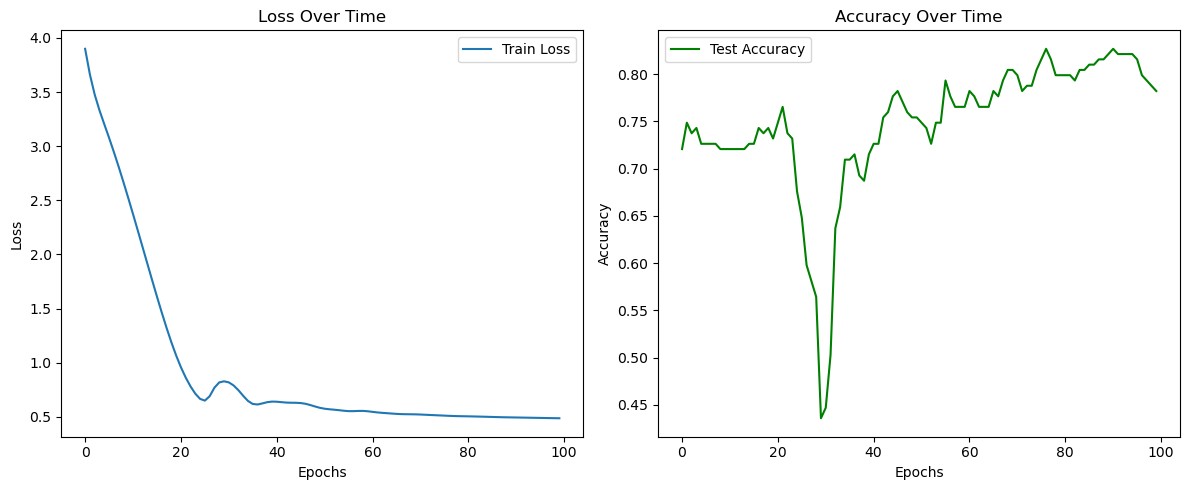

In [87]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load & preprocess Titanic data
df = pd.read_csv('titanic.csv')

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna('S')

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features].values
y = df['Survived'].values

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Step 3: Define model
model = nn.Linear(len(features), 2)  # Output: 2 classes

# Step 4: Training loop
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

epochs = 100
train_losses = []
test_accuracies = []

for epoch in range(epochs):
    # Forward pass
    logits = model(X_train)
    loss = loss_fn(logits, y_train)
    train_losses.append(loss.item())

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Test accuracy
    with torch.no_grad():
        test_logits = model(X_test)
        preds = torch.argmax(test_logits, dim=1)
        acc = (preds == y_test).float().mean().item()
        test_accuracies.append(acc)

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: Train Loss = {loss.item():.4f}, Test Accuracy = {acc:.4f}")

# Step 5: Plotting loss and accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.legend()

plt.tight_layout()
plt.show()
